# Research on apartment sales ads

This is data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years.  
The assignment is to learn how to determine the market value of real estate properties. Your task is to define the parameters. The research will make it possible to build an automated system capable of detecting anomalies and fraudulent activity.  
There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data, for example, the distance from the city center, airport, the nearest park, or body of water.

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

import sys
import warnings
if not sys.warnoptions:    
       warnings.simplefilter("ignore")

In [2]:
#reading the csv file and divding the data into columns by a seperator
location = '/some/local/path'
data = pd.read_csv(location + 'real_estate_data_us.csv', sep ='\t')

In [3]:
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [4]:
data.tail()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
23694,2017-03-21T00:00:00,NaN,194000.0,3,13.83,73.3,133.81,NaN,3.7,5.0,...,NaN,False,False,Saint Petersburg,24665.0,4232.0,796.0,1.0,381.0,3.0
23695,2018-01-15T00:00:00,45.0,62000.0,3,8.50,38.0,59.00,NaN,NaN,5.0,...,NaN,False,False,Tosno,NaN,NaN,NaN,NaN,NaN,NaN
23696,2018-02-11T00:00:00,NaN,50000.0,2,NaN,29.7,56.70,NaN,NaN,3.0,...,NaN,False,False,Rozhdestveno village,NaN,NaN,NaN,NaN,NaN,NaN
23697,2017-03-28T00:00:00,602.0,229500.0,2,23.30,NaN,76.75,2.0,3.0,17.0,...,NaN,False,False,Saint Petersburg,39140.0,10364.0,173.0,2.0,196.0,3.0
23698,2017-07-21T00:00:00,NaN,27000.0,1,9.00,12.3,32.30,NaN,2.5,5.0,...,NaN,False,False,Novy Uchkhoz village,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [6]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


In [7]:
data.isnull().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

### Conclusion

**Preliminayr findings:**<br> 
This dataset cosisnts of 23,699 rows (apartment listings) and 22 columns.<br>
* *date_posted* - object type. Should be converted.  <br>
* *days_listed* - 13.5% of values are NaN's. This requires investigation because this value should be automaticaly generated.<br>
* *last_price* - Should be conerted to int type.<br>
* *bedrooms* - min value- 0, max value- 19. <br> 
* *kitchen_area* - NaN values<br>
* *living_area* - NaN values<br>
* *total_area* - min value- 12, max value- 900. <br>
* *balconies* - NaN values<br>
* *ceiling_height* - NaN values, min value- 1m and max value- 100m.<br>
* *floors_total* - NaN values<br>
* *floor* - NaN values<br>
* *bike_parking* - most of the column is empty (88% of values are NaN)<br>
* *locality_name* - NaN values (only 0.2% of all values)<br>
* *airport_dist* - NaN values<br>
* *city_center_dist* - NaN values (23.2% of all values)<br>
* *park_dist* - NaN values<br>
* *parks_within_3000* - NaN values<br>
* *pond_dist* - NaN values<br>
* *ponds_within_3000* - NaN values<br>

### Step 2. Data preprocessing

In [8]:
#converting date_posted column from object type to datetime type, dropping hours, minutes and seconds
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [9]:
#investigating NaN's in the days_listed column 
data[data['days_listed'].isnull()].head(20)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,NaN,260000.0,3,25.0,51.00,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
7,2019-04-18,NaN,158300.0,2,18.9,NaN,71.6,2.0,NaN,24.0,...,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
44,2018-11-18,NaN,107000.0,1,NaN,NaN,40.0,1.0,NaN,22.0,...,NaN,False,False,Saint Petersburg,30471.0,11603.0,620.0,1.0,1152.0,1.0
45,2018-12-02,NaN,104000.0,2,7.0,30.30,50.6,NaN,2.65,9.0,...,NaN,False,False,Saint Petersburg,30011.0,12872.0,NaN,0.0,NaN,0.0
46,2019-01-31,NaN,132000.0,2,8.3,29.70,52.1,2.0,2.60,24.0,...,NaN,False,False,Saint Petersburg,15114.0,12702.0,NaN,0.0,NaN,0.0
49,2018-11-22,NaN,61000.0,1,6.0,18.00,30.8,NaN,2.50,9.0,...,NaN,False,False,Saint Petersburg,45341.0,16603.0,675.0,1.0,NaN,0.0
52,2017-09-22,NaN,235900.0,6,11.0,94.00,136.0,1.0,3.00,2.0,...,NaN,False,False,Saint Petersburg,16510.0,6582.0,526.0,1.0,NaN,0.0
71,2019-03-27,NaN,97000.0,3,6.2,39.00,57.5,NaN,2.50,9.0,...,NaN,False,False,Saint Petersburg,33623.0,12267.0,334.0,1.0,333.0,1.0
81,2018-12-27,NaN,218980.0,1,NaN,NaN,68.0,NaN,NaN,10.0,...,NaN,False,False,Saint Petersburg,NaN,NaN,NaN,NaN,NaN,NaN
84,2019-03-13,NaN,48000.0,2,5.2,27.46,43.9,NaN,NaN,2.0,...,NaN,False,False,Kirovsk,NaN,NaN,NaN,NaN,NaN,NaN


Examining the data, I couldn't find anything in common in the rows with values in days_listed.  
The values in this column should be automatically generated when the ad is removed.  
The logical explanation for the missing values would be that there was a system error at the time the ads were removed.  
I replaced these NaN's with the median using fillna() method and converted the type to int using astype() method.

In [10]:
data['days_listed'] = data['days_listed'].fillna(data['days_listed'].median())
data['days_listed'] = data['days_listed'].astype(int)
data['days_listed'].isnull().sum()

0

In [11]:
data.info() #test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_posted        23699 non-null  datetime64[ns]
 1   days_listed        23699 non-null  int32         
 2   last_price         23699 non-null  float64       
 3   bedrooms           23699 non-null  int64         
 4   kitchen_area       21421 non-null  float64       
 5   living_area        21796 non-null  float64       
 6   total_area         23699 non-null  float64       
 7   balconies          12180 non-null  float64       
 8   ceiling_height     14504 non-null  float64       
 9   floors_total       23613 non-null  float64       
 10  floor              23699 non-null  int64         
 11  total_images       23699 non-null  int64         
 12  bike_parking       2775 non-null   object        
 13  is_studio          23699 non-null  bool          
 14  is_ope

In [12]:
#last_price column devided by 1000 and rounded. 
#This is necessary to make the data readble in further investigation

data['last_price'] = round(data['last_price'] / 1000, 2)
data.rename(columns={"last_price": "last_price_in_k"}, inplace=True)
data.head() #test

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,95,260.00,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04,81,67.00,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20,558,103.92,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24,424,1298.00,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19,121,200.00,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


To replace NaN's in the kitchen area and living area columns, I calculated the median ratio between these areas (respectively) and the total area.  
I used the ratio to calculate the missing values for each listing.

In [13]:
#kitchen_area
kitchen_area_percent = data[['kitchen_area' , 'total_area']]  
kitchen_area_percent = kitchen_area_percent.dropna().reset_index(drop=True)
kitchen_area_percent['ratio'] = kitchen_area_percent['kitchen_area'] / kitchen_area_percent['total_area']
median_kitchen = kitchen_area_percent['ratio'].median()
median_kitchen

0.1724137931034483

In [14]:
data['kitchen_area'] = round(data['kitchen_area'].fillna(data['total_area'] * median_kitchen), 2)
data['kitchen_area'].isnull().sum()

0

In [15]:
#living_area
living_area_percent = data[['living_area' , 'total_area']]  
living_area_percent = living_area_percent.dropna().reset_index(drop=True)
living_area_percent['ratio'] = living_area_percent['living_area'] / living_area_percent['total_area']
median_living = living_area_percent['ratio'].median()
median_living

0.5678598992678503

In [16]:
data['living_area'] = round(data['living_area'].fillna(data['total_area'] * median_living), 2)
data['living_area'].isnull().sum()

0

In [17]:
data.head() #test

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,95,260.00,3,25.00,51.00,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04,81,67.00,1,11.00,18.60,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20,558,103.92,2,8.30,34.30,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24,424,1298.00,3,27.41,90.29,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19,121,200.00,2,41.00,32.00,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Balconies - The logical explanation for missing values in this column is no balconies in the property.

In [18]:
#I replaced the missing values with 0 using fillna() method. 
data['balconies'] = data['balconies'].fillna(0)
data['balconies'] = data['balconies'].astype(int)
data['balconies'].isnull().sum()

0

ceiling_height- replacing NaN's with the median. 

In [19]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isnull().sum()

0

floors_total- the NaN's will be replaced with the median building height in each locality.

In [20]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('locality_name')['floors_total'].transform('mean'))
data['floors_total'].isnull().sum()   

1

In [21]:
#There is only 1 row left missing a value in floors_total. I decided to drop it. 
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isnull().sum()  

0

locality_name- The NaN's are only 0.2% of the values, and there is no quick and efficient way to fill them.  
I decided to drop the rows.

In [22]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'].isnull().sum()

0

In [23]:
data.info() #test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_posted        23650 non-null  datetime64[ns]
 1   days_listed        23650 non-null  int32         
 2   last_price_in_k    23650 non-null  float64       
 3   bedrooms           23650 non-null  int64         
 4   kitchen_area       23650 non-null  float64       
 5   living_area        23650 non-null  float64       
 6   total_area         23650 non-null  float64       
 7   balconies          23650 non-null  int32         
 8   ceiling_height     23650 non-null  float64       
 9   floors_total       23650 non-null  float64       
 10  floor              23650 non-null  int64         
 11  total_images       23650 non-null  int64         
 12  bike_parking       2760 non-null   object        
 13  is_studio          23650 non-null  bool          
 14  is_ope

bike_parking- This column is mostly empty. 

In [24]:
data['bike_parking'].unique()

array([nan, False, True], dtype=object)

My first instinct was that nan might indicate no bike parking.  
Since there are both True and False values in this column, I think this was left out by the user.  
In my opinion, this indicates the insignificance of this parameter in the market. For this reason, I decided to drop the column.

In [25]:
data = data.drop(columns=['bike_parking'])

There are 6 columns that are calculated automatically based on map data (distances and amount of parks and ponds). <br>
NaN's in these columns might occur if the user didn't indicate the property location, or they might indicate 0. <br>
For the purpose of this investigation, the only significant column is city_center_dist, and the only significant locality is the city of Saint Petersburg. <br>
Out of 15,721 listings in the city, there are only 61 missing values in city_center_dist. Those will be filled by the median city_center_dist for the listings in this locality. <br>
All other columns will be dropped. <br>
In addition, total_images, is_studio, and is_open_plan columns are not necessary and will be dropped as well. 

In [26]:
#I created a subset of Saint Petersburg listings to help me investigate the NaN's and to calculate the mean. 
saint_petersburg = data.query('locality_name == "Saint Petersburg"')
print('Saint Petersburg listings:', len(data[(data['locality_name'] == 'Saint Petersburg')]))
saint_petersburg.isnull().sum()

Saint Petersburg listings: 15721


date_posted             0
days_listed             0
last_price_in_k         0
bedrooms                0
kitchen_area            0
living_area             0
total_area              0
balconies               0
ceiling_height          0
floors_total            0
floor                   0
total_images            0
is_studio               0
is_open_plan            0
locality_name           0
airport_dist           85
city_center_dist       61
park_dist            8437
parks_within_3000      61
pond_dist            7738
ponds_within_3000      61
dtype: int64

In [27]:
median_dist = saint_petersburg['city_center_dist'].median()
median_dist

12244.5

In [28]:
#using the above subset and fillna() method I replaced the missing values
data['city_center_dist'] = data.loc[data['locality_name'] == 'Saint Petersburg','city_center_dist'].fillna(median_dist)
saint_petersburg_new = data.query('locality_name == "Saint Petersburg"') #test
saint_petersburg_new.isnull().sum() #test

date_posted             0
days_listed             0
last_price_in_k         0
bedrooms                0
kitchen_area            0
living_area             0
total_area              0
balconies               0
ceiling_height          0
floors_total            0
floor                   0
total_images            0
is_studio               0
is_open_plan            0
locality_name           0
airport_dist           85
city_center_dist        0
park_dist            8437
parks_within_3000      61
pond_dist            7738
ponds_within_3000      61
dtype: int64

In [29]:
#Dropping columns
data = data.drop(columns=['total_images', 'is_studio','is_open_plan','airport_dist',
                          'park_dist','parks_within_3000','pond_dist','ponds_within_3000']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_posted       23650 non-null  datetime64[ns]
 1   days_listed       23650 non-null  int32         
 2   last_price_in_k   23650 non-null  float64       
 3   bedrooms          23650 non-null  int64         
 4   kitchen_area      23650 non-null  float64       
 5   living_area       23650 non-null  float64       
 6   total_area        23650 non-null  float64       
 7   balconies         23650 non-null  int32         
 8   ceiling_height    23650 non-null  float64       
 9   floors_total      23650 non-null  float64       
 10  floor             23650 non-null  int64         
 11  locality_name     23650 non-null  object        
 12  city_center_dist  15721 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(2), int64(2), object(1)
memory usage

In [30]:
data.head()

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,locality_name,city_center_dist
0,2019-03-07,95,260.00,3,25.00,51.00,108.0,0,2.70,16.0,8,Saint Petersburg,16028.0
1,2018-12-04,81,67.00,1,11.00,18.60,40.4,2,2.65,11.0,1,Shushary village,NaN
2,2015-08-20,558,103.92,2,8.30,34.30,56.0,0,2.65,5.0,4,Saint Petersburg,13933.0
3,2015-07-24,424,1298.00,3,27.41,90.29,159.0,0,2.65,14.0,9,Saint Petersburg,6800.0
4,2018-06-19,121,200.00,2,41.00,32.00,100.0,0,3.03,14.0,13,Saint Petersburg,8098.0


### Step 3. Make calculations and add them to the table

In [31]:
#Calculating the price per square meter
data['price_per_sqm'] = round(data['last_price_in_k'] / data['total_area'] , 2)

In [32]:
#Calculating the day of the week, month, and year that the ad was published
data['publish_weekday'] = data['date_posted'].dt.weekday
data['publish_month'] = data['date_posted'].dt.month
data['publish_year'] = data['date_posted'].dt.year

In [33]:
#which floor the apartment is on (first, last, or other)
data.loc[data['floor'] == 1, 'floor_category'] = 'first'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'last'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'other'

In [34]:
#Calculating the ratio between the living space and the total area
data['living_space_ratio'] = round(data['total_area'] / data['living_area'], 2)

In [35]:
#Calculating the ratio between the kitchen space and the total area
data['kitchen_space_ratio'] = round(data['total_area'] / data['kitchen_area'], 2)

In [36]:
data.head()

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,locality_name,city_center_dist,price_per_sqm,publish_weekday,publish_month,publish_year,floor_category,living_space_ratio,kitchen_space_ratio
0,2019-03-07,95,260.00,3,25.00,51.00,108.0,0,2.70,16.0,8,Saint Petersburg,16028.0,2.41,3,3,2019,other,2.12,4.32
1,2018-12-04,81,67.00,1,11.00,18.60,40.4,2,2.65,11.0,1,Shushary village,NaN,1.66,1,12,2018,first,2.17,3.67
2,2015-08-20,558,103.92,2,8.30,34.30,56.0,0,2.65,5.0,4,Saint Petersburg,13933.0,1.86,3,8,2015,other,1.63,6.75
3,2015-07-24,424,1298.00,3,27.41,90.29,159.0,0,2.65,14.0,9,Saint Petersburg,6800.0,8.16,4,7,2015,other,1.76,5.80
4,2018-06-19,121,200.00,2,41.00,32.00,100.0,0,3.03,14.0,13,Saint Petersburg,8098.0,2.00,1,6,2018,other,3.12,2.44


In [37]:
#test
test = data[['floor','floors_total','floor_category']]
test.head(20)

,floor,floors_total,floor_category
0,8,16.0,other
1,1,11.0,first
2,4,5.0,other
3,9,14.0,other
4,13,14.0,other
5,5,12.0,other
6,6,26.0,other
7,22,24.0,other
8,26,27.0,other
9,7,9.0,other


In [38]:
data.info() #test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_posted          23650 non-null  datetime64[ns]
 1   days_listed          23650 non-null  int32         
 2   last_price_in_k      23650 non-null  float64       
 3   bedrooms             23650 non-null  int64         
 4   kitchen_area         23650 non-null  float64       
 5   living_area          23650 non-null  float64       
 6   total_area           23650 non-null  float64       
 7   balconies            23650 non-null  int32         
 8   ceiling_height       23650 non-null  float64       
 9   floors_total         23650 non-null  float64       
 10  floor                23650 non-null  int64         
 11  locality_name        23650 non-null  object        
 12  city_center_dist     15721 non-null  float64       
 13  price_per_sqm        23650 non-

### Step 4. Conduct exploratory data analysis

##### Investigate the following parameters: square area, price, number of rooms, and ceiling height. 

In [39]:
columns=['total_area','last_price_in_k','bedrooms','ceiling_height']

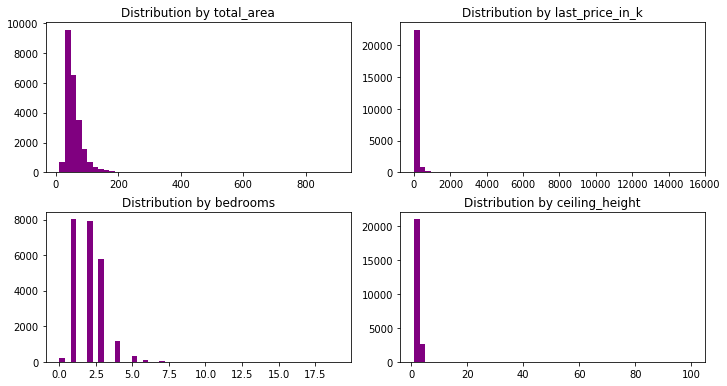

In [40]:
fig = plt.figure(figsize=(10,6))
grid = gs.GridSpec(2, 2, height_ratios=[2,2])
for c in range(len(columns)): 
    subset = data[columns[c]]
    ax = plt.subplot(grid[c])
    ax.hist(subset, bins= 50, color='purple', alpha=1)
    ax.set_title('Distribution by %s' % columns[c])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

Judging by the fact that the histograms are concentrated on the left of the range, there are obvious outliers, i.e. there is a ceiling height of 100m.  
Since bedrooms is a discrete variable, I will also look at a barchart for more clarity.  

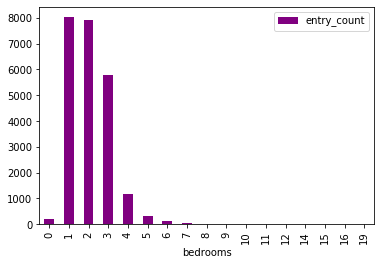

In [41]:
grouped_bedrooms = data.groupby('bedrooms').agg({'date_posted':'count'}).rename(columns={'bedrooms':'bedrooms','date_posted':'entry_count'}).reset_index()

grouped_bedrooms.plot.bar(x='bedrooms', y='entry_count', color='purple');

In [42]:
for c in columns: 
    print(c)
    print(data[c].describe())
    print('')

total_area
count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

last_price_in_k
count    23650.000000
mean       130.822537
std        217.927987
min          0.240000
25%         68.000000
50%         93.000000
75%        135.980000
max      15260.000000
Name: last_price_in_k, dtype: float64

bedrooms
count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

ceiling_height
count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64



In [43]:
#Let's write a function to compute the normal range of values for a column. The normal range of values is everything between
#Q1 - 1.5*IQR and Q3 + 1.5*IQR 

def normal_range(df,c):
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3-Q1
    
    return (Q1-1.5*IQR,Q3+1.5*IQR)    

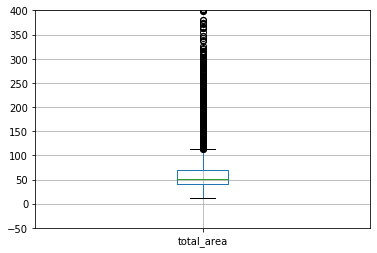

In [44]:
plt.ylim(-50,400)
data.boxplot(column='total_area');

In [45]:
normal_range(data,'total_area')

(-4.550000000000004, 114.25)

The min value in the column is 12. An area will be considered an outlier if it exceeds 114sqm.  

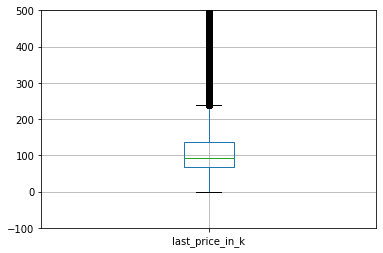

In [46]:
plt.ylim(-100,500)
data.boxplot(column='last_price_in_k');

In [47]:
normal_range(data,'last_price_in_k')

(-33.969999999999985, 237.95)

The min price is 240. Any price above 237,950 will be considered an outlier. 

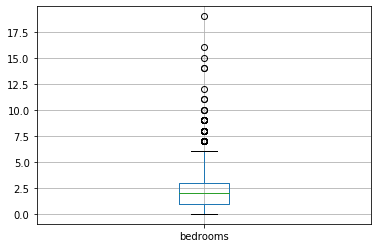

In [48]:
data.boxplot(column='bedrooms');

In [49]:
normal_range(data,'bedrooms')

(-2.0, 6.0)

Min value here is 0. Any listing with more than 6 rooms will be viewed as an outlier.

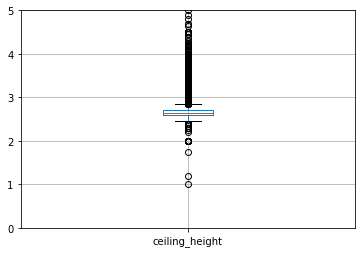

In [50]:
plt.ylim(0,5)
data.boxplot(column='ceiling_height');

In [51]:
normal_range(data,'ceiling_height')

(2.45, 2.8500000000000005)

Normal values in this column are between 2.45 and 2.85. 

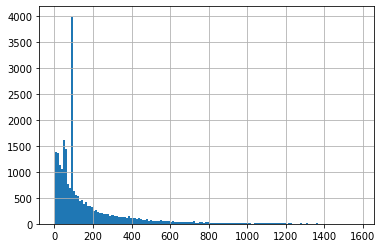

In [52]:
data['days_listed'].hist(bins = 150)

In [53]:
print('The mean time it takes to sell a property is: {:.1f} days'.format(data['days_listed'].mean()))
print('The median time it takes to sell a property is: {:.1f} days'.format(data['days_listed'].median()))

The mean time it takes to sell a property is: 169.2 days
The median time it takes to sell a property is: 95.0 days


The spike in listings that were removed after 95 days is due to the replacement of NaN's with the median. 

In [54]:
data['days_listed'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_listed, dtype: float64

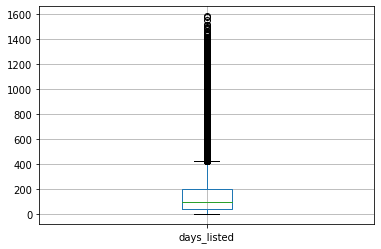

In [55]:
data.boxplot(column='days_listed');

In [56]:
normal_range(data,'days_listed')

(-184.5, 427.5)

The average time to sell an apartment is about 169 days. A long sale time would be more than 200 days. A short sale time is below 50. There are no outliers below the first quartile. Any value above 400 days can be considered an outlier as it is larger than Q3 + 1.5*IQR. 

In [57]:
#Creating a subset without outliers. 
good_data = data.query('days_listed < 400 and total_area < 114 and last_price_in_k < 237.95 and bedrooms <= 6 and ceiling_height > 2.45 and ceiling_height < 2.85')
good_data = good_data.reset_index(drop=True)
good_data.head()

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,locality_name,city_center_dist,price_per_sqm,publish_weekday,publish_month,publish_year,floor_category,living_space_ratio,kitchen_space_ratio
0,2018-12-04,81,67.0,1,11.00,18.60,40.40,2,2.65,11.0,1,Shushary village,NaN,1.66,1,12,2018,first,2.17,3.67
1,2018-09-10,55,57.8,1,9.10,14.40,30.40,0,2.65,12.0,5,Yanino-1 village,NaN,1.90,0,9,2018,other,2.11,3.34
2,2017-11-02,155,74.0,1,14.40,10.60,37.30,1,2.65,26.0,6,Pargolovo village,NaN,1.98,3,11,2017,other,3.52,2.59
3,2019-04-18,95,158.3,2,18.90,40.66,71.60,2,2.65,24.0,22,Saint Petersburg,11634.0,2.21,3,4,2019,other,1.76,3.79
4,2018-05-23,189,58.0,1,8.81,15.43,33.16,0,2.65,27.0,26,Murino village,NaN,1.75,2,5,2018,other,2.15,3.76


In [58]:
#Creating a correlation matrix to investigate factors that influance price
correlation = good_data[['total_area','last_price_in_k','ceiling_height','city_center_dist']].corr()
correlation

,total_area,last_price_in_k,ceiling_height,city_center_dist
total_area,1.000000,0.675668,0.121626,-0.091891
last_price_in_k,0.675668,1.000000,0.232996,-0.261470
ceiling_height,0.121626,0.232996,1.000000,-0.059790
city_center_dist,-0.091891,-0.261470,-0.059790,1.000000


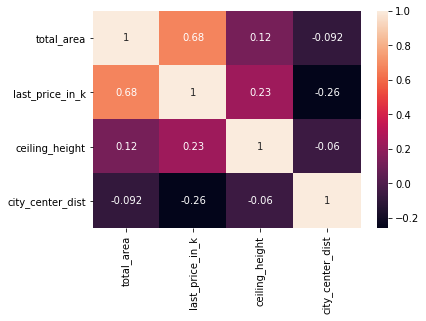

In [59]:
#visualization of correlation matrix using a heatmap
sns.heatmap(correlation, xticklabels=True, yticklabels=True, annot=True)

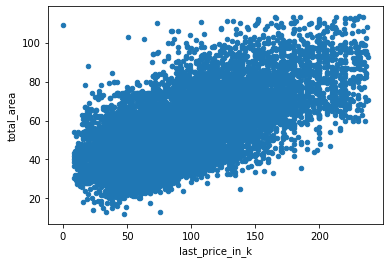

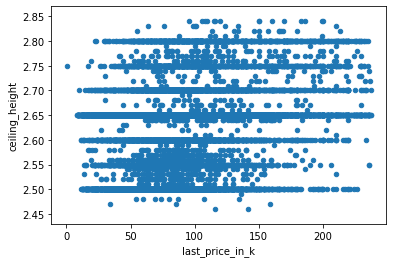

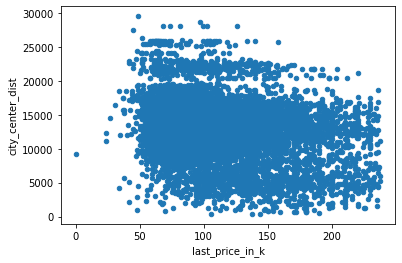

In [60]:
#visualization of correlations using scatter plot
for c in ['total_area','ceiling_height','city_center_dist']:
    good_data.plot(x='last_price_in_k', y= c, kind='scatter')

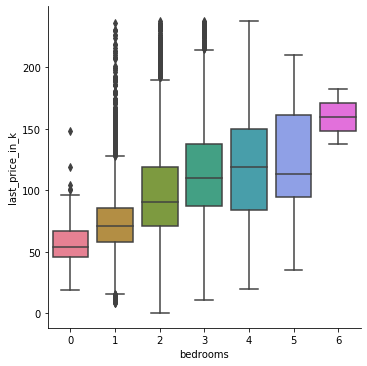

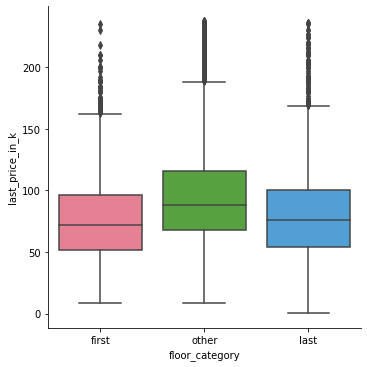

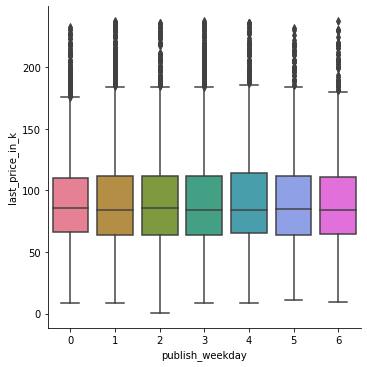

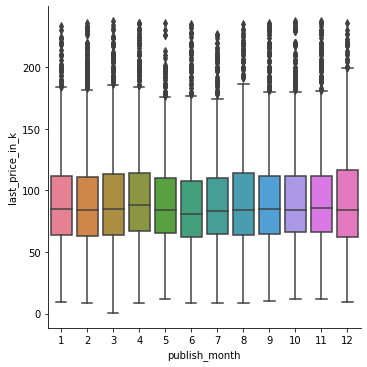

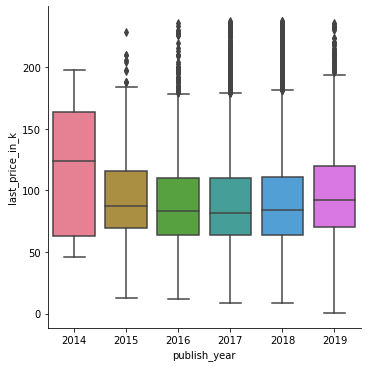

In [61]:
for column in ['bedrooms', 'floor_category', 'publish_weekday', 'publish_month', 'publish_year']:
    sns.catplot(x=column, y='last_price_in_k', kind='box', data=good_data, palette='husl')

#####  Conclusions regarding factors influancing price:
* total_area - the correlation between apartment area and price is 0.68. Naturally, it has the biggest influence on the price out of all these factors. We can also see it in the scatter plot. The larger the apartment- the higher the price. <br>
* bedrooms - This is the second biggest factor with a correlation of 0.41. We can clearly see in the box plot that the price range increases with the room number. <br>
* city_center_dist - There is a negative correlation between city center distance and price, meaning that the smaller the distance, the higher the price. <br> 
* ceiling_height - We can see on the scatter plot that there is a pretty even distribution of prices for every ceiling height. <br>
* floor_category- The box plot shows that there is a slight rise in price for apartments in the middle of the building. This makes sense. People avoid the first floor due to break-ins and avoid the last floor due to leaks. 
* publication date- It is clear that publication day and month have little to no effect on the price. As for the year of publication- we can see that prices were higher in 2014. The prices dropped in 2015 and stayed at the same level until 2019.

In [62]:
#10 localities with the largest number of ads and average price per square meter in these localities. 
#Data is sorted highest to lowest.
top_ten_local = good_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count','mean']).sort_values(('count', 'price_per_sqm'), ascending=False).head(10)
top_ten_local.sort_values(('mean','price_per_sqm'), ascending=False)

,count,mean
,price_per_sqm,price_per_sqm
locality_name,,
Saint Petersburg,10798,2.095933
Pushkin,265,1.988981
Kudrovo village,257,1.855136
Pargolovo village,293,1.800512
Murino village,501,1.716567
Shushary village,394,1.576117
Kolpino,290,1.506241
Gatchina,251,1.369283


In [63]:
#Creating a subset of Saint Petersburg listings and calculating distance to city center in km and price per km. 
sp_apartments = good_data.query('locality_name == "Saint Petersburg"')
sp_apartments['city_center_dist_km'] = round(sp_apartments['city_center_dist'] / 1000, 0).astype(int)
sp_apartments['price_per_km'] = sp_apartments['last_price_in_k'] / sp_apartments['city_center_dist_km']
sp_apartments.head()

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,city_center_dist,price_per_sqm,publish_weekday,publish_month,publish_year,floor_category,living_space_ratio,kitchen_space_ratio,city_center_dist_km,price_per_km
3,2019-04-18,95,158.3,2,18.9,40.66,71.6,2,2.65,24.0,...,11634.0,2.21,3,4,2019,other,1.76,3.79,12,13.191667
5,2017-02-26,289,108.0,3,6.5,43.60,61.0,2,2.50,9.0,...,15008.0,1.77,6,2,2017,other,1.40,9.38,15,7.200000
6,2017-11-16,137,101.0,1,8.5,20.30,39.6,0,2.67,12.0,...,13878.0,2.55,3,11,2017,other,1.95,4.66,14,7.214286
11,2017-11-18,19,93.0,1,7.6,20.50,39.0,1,2.65,14.0,...,14259.0,2.38,5,11,2017,other,1.90,5.13,14,6.642857
12,2017-01-27,168,65.0,1,5.6,19.40,31.0,1,2.50,5.0,...,10842.0,2.10,4,1,2017,other,1.60,5.54,11,5.909091


In [64]:
#calculating the average price for each kilometer 
sp_dist_pivot = sp_apartments.pivot_table(index='city_center_dist_km', values='price_per_km',aggfunc='mean')
sp_dist_pivot

,price_per_km
city_center_dist_km,
0,inf
1,154.871667
2,75.566716
3,46.511789
4,35.531256
5,29.377879
6,22.973400
7,18.459244
8,15.423114


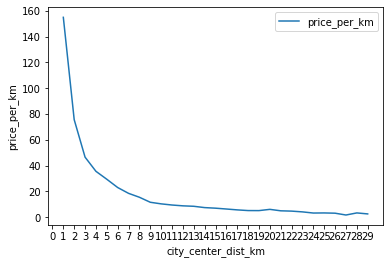

In [65]:
#graph that displays how prices are affected by the distance to the city center
ax = sp_dist_pivot.plot(xticks=sp_dist_pivot.index)
ylab = ax.set_ylabel('price_per_km')

##### City center conclusions:
From the graph above, we can see a series of declines, the first change of decline happens at the 2km boundary.
Thus I conclude that a 2km radius defines the city center.

In [66]:
sp_center = sp_apartments.query('city_center_dist_km <= 2').reset_index(drop=True)
sp_center.head()

,date_posted,days_listed,last_price_in_k,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,city_center_dist,price_per_sqm,publish_weekday,publish_month,publish_year,floor_category,living_space_ratio,kitchen_space_ratio,city_center_dist_km,price_per_km
0,2015-10-31,265,130.0,2,19.6,46.5,97.2,0,2.65,3.0,...,2336.0,1.34,5,10,2015,first,2.09,4.96,2,65.0
1,2019-04-24,95,159.0,4,12.7,52.7,86.4,0,2.65,3.0,...,2468.0,1.84,2,4,2019,first,1.64,6.80,2,79.5
2,2017-01-26,35,225.0,2,8.0,43.0,71.0,0,2.65,3.0,...,1217.0,3.17,3,1,2017,last,1.65,8.88,1,225.0
3,2017-05-13,228,153.6,3,10.3,50.9,83.1,0,2.65,3.0,...,1803.0,1.85,5,5,2017,last,1.63,8.07,2,76.8
4,2017-06-02,160,164.0,2,10.0,39.0,64.0,0,2.65,2.0,...,2309.0,2.56,4,6,2017,last,1.64,6.40,2,82.0


In [67]:
#correlation matrix for city center properties
sp_corelation = sp_center[['total_area','last_price_in_k','bedrooms','ceiling_height']].corr()
sp_corelation

,total_area,last_price_in_k,bedrooms,ceiling_height
total_area,1.000000,0.695657,0.753721,0.005185
last_price_in_k,0.695657,1.000000,0.583028,-0.040717
bedrooms,0.753721,0.583028,1.000000,0.074105
ceiling_height,0.005185,-0.040717,0.074105,1.000000


##### Conclusions regarding property prices influences in the city center:
* total area- The correlation between area and price is almost the same for the city center and for the area- 6.9 and 6.8 respectively. 
* ceiling height - very small correlation. Ceiling height has little to no effect on price. 
* Bedrooms - The price increases with bedroom number. The most significant jump in price is between 1 and 2 bedrooms. This is the same trend we see in the entire area except that in the city center there is a bigger gap between 1 and 2 bedroom apartments (one-bedroom apartments are less desired). 
* floor_category - We see the same trend as before. First-floor apartments are less desired. 
* Publishing year - There were no listings for city center apartments in 2014. In 2015-2019 the median price remained steady. This is a similar trend to what we saw in all listings. 

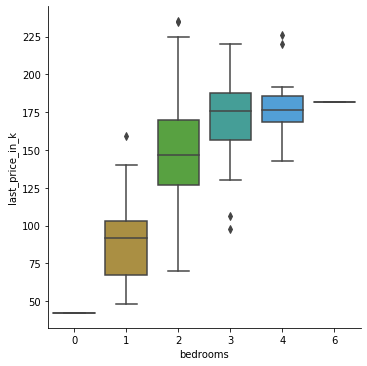

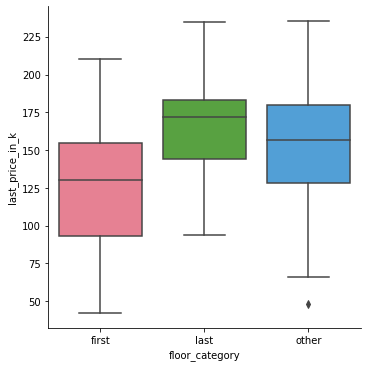

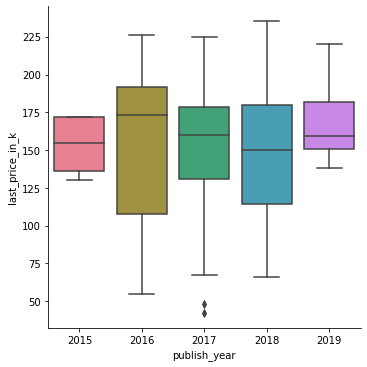

In [68]:
for column in ['bedrooms', 'floor_category', 'publish_year']:
    sns.catplot(x=column, y='last_price_in_k', kind='box', data=sp_center, palette='husl')

### Step 5. Overall conclusion

As specified above, the biggest influences on market value is total area, number of bedrooms, and proximity to the city center. 
The floor category also has some effect. As expected, the market prefers floors that are in the middle of the building. 
The number of bedrooms has a stronger effect in the city center than outside of it, while the date and month of publication did not affect the price. The city center boundary appears to be a radius of 2km.